In [1]:
!pip install snscrape

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
pip install langdetect

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 981 kB 6.8 MB/s 
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993242 sha256=2eb6d8950e6dd2efc7e7060b42d8c2f66068f72952bdd297839304f0acf3672e
  Stored in directory: /root/.cache/pip/wheels/c5/96/8a/f90c59ed25d75e50a8c10a1b1c2d4c402e4dacfa87f3aff36a
Successfully built langdetect


In [3]:
import snscrape.modules.twitter as sntwitter
import json
from langdetect import detect

In [11]:
keywords=['KDRT']
start="2022–10–06"
end ="2022–10–16"
max_num=100
fname='tweet.json' 
languages=['id','en']

In [12]:
import pandas as pd
datatw=[]

In [13]:
for keyword in keywords:
   
    for i, tweet in enumerate (sntwitter.TwitterSearchScraper(f'{keyword} ').get_items()):
        
        try:
            lan=detect(tweet.content)
        except:
            lan='error'
        if i == max_num:
            break
        if lan in languages:
            data = {'id': tweet.id, 'username':tweet.username, 'date': tweet.date, 'text': tweet.content,'url':tweet.url}
           # print(data)
            datatw.append(tweet.content)
            with open(fname, 'a+', encoding='utf-8') as f:
                line = json.dumps(data, ensure_ascii=False,default=str)
                #print(line)
                f.write(line)
                f.write('\n')

In [14]:
datatw

['Pernah denger jg kabar , ada temen yg menjadi korban kdrt oleh suaminya, bahkan dari saat hamil, sampe melahirkan, dan sampai skrg, pada saat di tanya knp masih mempertahankan rumah tangganya, alasannya ya karena demi si Anak.',
 'Lesti Kejora Cabut Laporan KDRT, Polisi : Proses Hukum Masih Berlanjut\nhttps://t.co/8mYuZ2MNBp https://t.co/rGcK6H38mg',
 '@asanilta Ada juga korban KDRT yang akhirnya tidak kembali kepada keluarganya tapi kembali kepada Sang Khalik karena dibakar hidup2, dimutilasi, disiram air keras, dicor semen dsbnya oleh suaminya. Pelaku KDRT juga perlu terapi psikologis untuk kejiwaannya bukan hanya hukuman penjara.',
 'KDRT, jangan berharap orang yg suka main fisik bakal berubah, itu tipuan.',
 'Tak hanya dibanting dan dicekik! Ini 5 jenis KDRT yang perlu diketahui para istri https://t.co/69mFkVQe6L',
 'Boxer pria harga murah bahan GK murahan\n🌟4.9\n📌https://t.co/Z6be3ng5v5\n\nTag\nRambut/KDRT/Pagii/#motoGP #LISA #IkatanCintaEp913 https://t.co/tJ3pqXvnWm',
 'Rizky B

In [16]:
pip install Sastrawi

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [17]:
import re
import string
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory# create stemmer
factory = StemmerFactory()
stemmer = factory.create_stemmer()# stemming process
# import StopWordRemoverFactory class
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
factory = StopWordRemoverFactory()
stopword = factory.create_stop_word_remover()
documents_clean=[]

for d in datatw:
    outputstem= stemmer.stem(d)
    d= stopword.remove(outputstem)
    # Remove Unicode
    document_test = re.sub(r'[^\x00-\x7F]+', ' ', d)
    # Remove Mentions
    document_test = re.sub(r'@\w+', '', document_test)
    # Lowercase the document
    document_test = document_test.lower()
    # Remove punctuations
    document_test = re.sub(r'[%s]' % re.escape(string.punctuation), ' ', document_test)
    # Lowercase the numbers
    document_test = re.sub(r'[0-9]', '', document_test)
    # Remove the doubled space
    outputstop = re.sub(r'\s{2,}', ' ', document_test)
    documents_clean.append(outputstop)

In [18]:
documents_clean[0:5]

['pernah denger jg kabar temen yg jadi korban kdrt suami bahkan saat hamil sampe lahir sampai skrg saat tanya knp tahan rumah tangga alas karena si anak',
 'lesti kejora cabut lapor kdrt polisi proses hukum lanjut https t co myuzmnbp https t co rgckhmg',
 'asanilta korban kdrt akhir kembali keluarga kembali sang khalik bakar hidup mutilasi siram air keras cor semen dsbnya suami laku kdrt juga perlu terapi psikologis jiwa bukan hukum penjara',
 'kdrt jangan harap orang yg suka main fisik bakal ubah tipu',
 'tak banting cekik jenis kdrt perlu tahu istri https t co mfkvqel']

In [19]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd
tfidfvectorizer = TfidfVectorizer(analyzer='word')
tfidf_wm = tfidfvectorizer.fit_transform(documents_clean)
tfidf_tokens = tfidfvectorizer.get_feature_names()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


Text(0.5, 1.0, 'Most Frequently Occuring Words - Top 20')

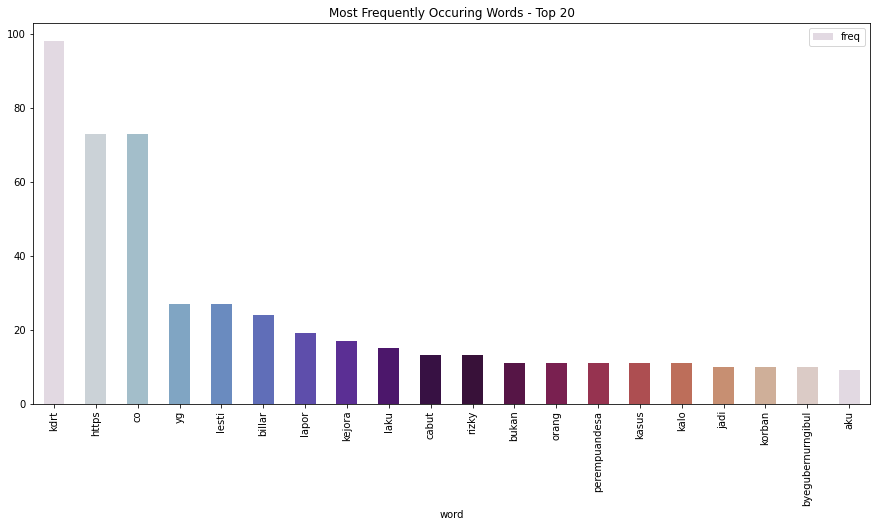

In [20]:
from sklearn.feature_extraction.text import CountVectorizer 
import matplotlib.pyplot as plt
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
cv = CountVectorizer()
words = cv.fit_transform(documents_clean)
sum_words = words.sum(axis=0)


words_freq = [(word, sum_words[0, idx]) for word, idx in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)
frequency = pd.DataFrame(words_freq, columns=['word', 'freq'])

color = plt.cm.twilight(np.linspace(0, 1, 20))
frequency.head(20).plot(x='word', y='freq', kind='bar', figsize=(15, 7), color = color)
plt.title("Most Frequently Occuring Words - Top 20")

In [21]:
from sklearn.cluster import KMeans
true_k = 3
model = KMeans(n_clusters=true_k, init='k-means++', max_iter=100, n_init=1)
model.fit(words)

KMeans(max_iter=100, n_clusters=3, n_init=1)

In [22]:
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = cv.get_feature_names()

for i in range(true_k):
    print("Cluster %d:" % i),
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind]),
    print

print("\n")

Cluster 0:
 kdrt
 kembali
 jiwa
 khalik
 korban
 terapi
 bakar
 siram
 sang
 mutilasi
Cluster 1:
 video
 kata
 emak
 bahak
 anjing
 ule
 kenal
 mang
 sebut
 kecewa
Cluster 2:
 kdrt
 https
 co
 yg
 lesti
 billar
 lapor
 kejora
 cabut
 laku




/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


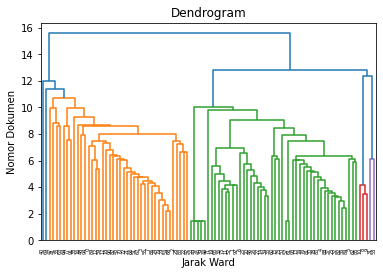

In [23]:
import scipy.cluster.hierarchy as sch
X = cv.fit_transform(documents_clean).todense()
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward',metric='euclidean'),orientation="top")
plt.title('Dendrogram')
plt.xlabel('Jarak Ward')
plt.ylabel('Nomor Dokumen')
plt.show()

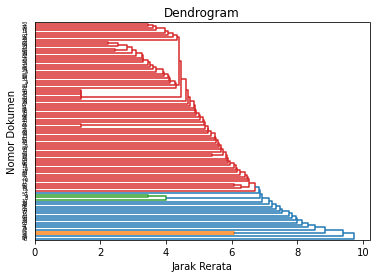

In [24]:
import scipy.cluster.hierarchy as sch
X = cv.fit_transform(documents_clean).todense()
dendrogram = sch.dendrogram(sch.linkage(X, method = 'average',metric='euclidean'),orientation="right")
plt.title('Dendrogram')
plt.xlabel('Jarak Rerata')
plt.ylabel('Nomor Dokumen')
plt.show()